In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# 1. Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\MINI_project\Data_p\reduced_dataset.csv")
#|df.drop(columns=["RISK_MM"], inplace=True)

# 2. Feature & Target
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"].astype(int)

# 3. Normalize Input
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
# 5. Build ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# 7. Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 8. Evaluation
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
gmean = np.sqrt(rec_1 * rec_0) 
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

D:\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8182 - loss: 0.4188 - val_accuracy: 0.8881 - val_loss: 0.2569
Epoch 2/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9029 - loss: 0.2450 - val_accuracy: 0.9288 - val_loss: 0.1933
Epoch 3/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9189 - loss: 0.2133 - val_accuracy: 0.9262 - val_loss: 0.1958
Epoch 4/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.1944 - val_accuracy: 0.9364 - val_loss: 0.1608
Epoch 5/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9292 - loss: 0.1859 - val_accuracy: 0.9343 - val_loss: 0.1772
Epoch 6/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9307 - loss: 0.1819 - val_accuracy: 0.9334 - val_loss: 0.1753
Epoch 7/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9315 - loss: 0.1803 - val_accuracy: 0.9411 - val_loss: 0.1548
Epoch 8/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.1777 - 

ANN Results:
Accuracy       : 0.94
Precision (1)  : 0.92
Precision (0)  : 0.95
Recall (1)     : 0.81
Recall (0)     : 0.98
F1 Score (1)   : 0.86
F1 Score (0)   : 0.96
G-Mean         : 0.89
ROC AUC Score  : 0.97

Confusion Matrix:
 [[21623   475]
 [ 1191  5150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     22098
           1       0.92      0.81      0.86      6341

    accuracy                           0.94     28439
   macro avg       0.93      0.90      0.91     28439
weighted avg       0.94      0.94      0.94     28439



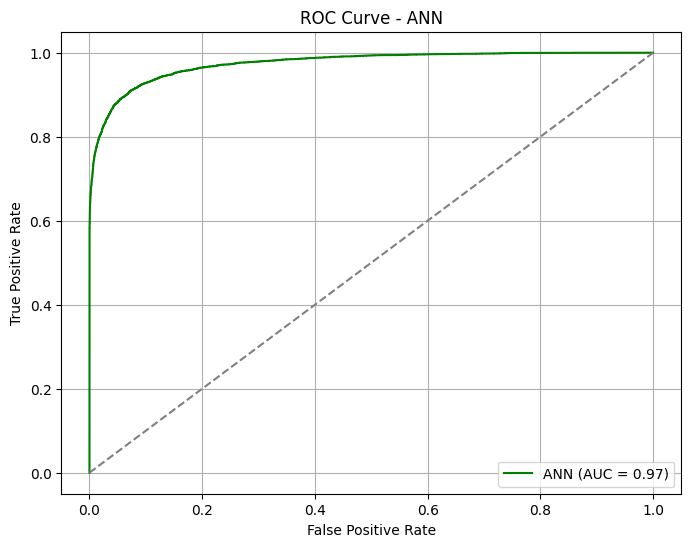

In [7]:
# 9. Output
print("ANN Results:")
print(f"Accuracy       : {acc:.2f}")
print(f"Precision (1)  : {prec_1:.2f}")
print(f"Precision (0)  : {prec_0:.2f}")
print(f"Recall (1)     : {rec_1:.2f}")
print(f"Recall (0)     : {rec_0:.2f}")
print(f"F1 Score (1)   : {f1_1:.2f}")
print(f"F1 Score (0)   : {f1_0:.2f}")
print(f"G-Mean         : {gmean:.2f}")
print(f"ROC AUC Score  : {auc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ANN (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend()
plt.grid(True)
plt.show()